In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import torch

# Check if a GPU is available
if torch.cuda.is_available():
    print("GPU is available.")
    print(f"Device Name: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available.")


GPU is available.
Device Name: Tesla T4


In [3]:
print(torch.version.cuda)


12.1


In [4]:
import torch
from IPython.display import Image
import shutil
import os
from random import choice

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [6]:
ML_Model = []
precision = []
recall = []
mAP = []

#function to call for storing the results
def storeResults(model, a,b,c):
    ML_Model.append(model)
    precision.append(round(a, 3))
    recall.append(round(b, 3))
    mAP.append(round(c, 3))

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
import random
import shutil

def reduce_dataset(image_dir, annotation_dir, output_image_dir, output_annotation_dir, subset_size):
    """
    Reduce the size of the dataset by randomly selecting a subset of images and annotations.

    Parameters:
    - image_dir: Path to the directory containing images.
    - annotation_dir: Path to the directory containing annotation files.
    - output_image_dir: Path to save the selected images.
    - output_annotation_dir: Path to save the selected annotations.
    - subset_size: Number of images and annotations to include in the reduced dataset.
    """
    # Ensure output directories exist
    os.makedirs(output_image_dir, exist_ok=True)
    os.makedirs(output_annotation_dir, exist_ok=True)

    # List all image files
    images = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    if subset_size > len(images):
        print("Subset size is larger than the total dataset size. Using the entire dataset.")
        subset_size = len(images)

    # Randomly sample a subset
    selected_images = random.sample(images, subset_size)

    # Copy the selected images and corresponding annotations
    for image_name in selected_images:
        # Copy image file
        src_image_path = os.path.join(image_dir, image_name)
        dest_image_path = os.path.join(output_image_dir, image_name)
        shutil.copy(src_image_path, dest_image_path)

        # Copy corresponding annotation file (assumes same name but .txt extension)
        annotation_name = os.path.splitext(image_name)[0] + '.txt'
        src_annotation_path = os.path.join(annotation_dir, annotation_name)
        dest_annotation_path = os.path.join(output_annotation_dir, annotation_name)
        if os.path.exists(src_annotation_path):  # Ensure annotation exists
            shutil.copy(src_annotation_path, dest_annotation_path)
        else:
            print(f"Warning: Annotation file not found for {image_name}")

    print(f"Reduced dataset saved to {output_image_dir} and {output_annotation_dir}")

# Example usage
image_directory = "/content/drive/MyDrive/Road Damage Detection using Yolov8 - Copy/yolov8/train/images"  # Replace with your images folder path
annotation_directory = "/content/drive/MyDrive/Road Damage Detection using Yolov8 - Copy/yolov8/train/labels"  # Replace with your annotations folder path
output_image_directory = "/content/drive/MyDrive/Detection/red_dataset/train/images"
output_annotation_directory = "/content/drive/MyDrive/Detection/red_dataset/train/labels"
subset_size = 1000  # Specify the desired number of images and annotations

reduce_dataset(image_directory, annotation_directory, output_image_directory, output_annotation_directory, subset_size)


Reduced dataset saved to /content/drive/MyDrive/Detection/red_dataset/train/images and /content/drive/MyDrive/Detection/red_dataset/train/labels


In [9]:
import os
import random
import shutil

def reduce_dataset(image_dir, annotation_dir, output_image_dir, output_annotation_dir, subset_size):
    """
    Reduce the size of the dataset by randomly selecting a subset of images and annotations.

    Parameters:
    - image_dir: Path to the directory containing images.
    - annotation_dir: Path to the directory containing annotation files.
    - output_image_dir: Path to save the selected images.
    - output_annotation_dir: Path to save the selected annotations.
    - subset_size: Number of images and annotations to include in the reduced dataset.
    """
    # Ensure output directories exist
    os.makedirs(output_image_dir, exist_ok=True)
    os.makedirs(output_annotation_dir, exist_ok=True)

    # List all image files
    images = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    if subset_size > len(images):
        print("Subset size is larger than the total dataset size. Using the entire dataset.")
        subset_size = len(images)

    # Randomly sample a subset
    selected_images = random.sample(images, subset_size)

    # Copy the selected images and corresponding annotations
    for image_name in selected_images:
        # Copy image file
        src_image_path = os.path.join(image_dir, image_name)
        dest_image_path = os.path.join(output_image_dir, image_name)
        shutil.copy(src_image_path, dest_image_path)

        # Copy corresponding annotation file (assumes same name but .txt extension)
        annotation_name = os.path.splitext(image_name)[0] + '.txt'
        src_annotation_path = os.path.join(annotation_dir, annotation_name)
        dest_annotation_path = os.path.join(output_annotation_dir, annotation_name)
        if os.path.exists(src_annotation_path):  # Ensure annotation exists
            shutil.copy(src_annotation_path, dest_annotation_path)
        else:
            print(f"Warning: Annotation file not found for {image_name}")

    print(f"Reduced dataset saved to {output_image_dir} and {output_annotation_dir}")

# Example usage
image_directory = "/content/drive/MyDrive/Road Damage Detection using Yolov8 - Copy/yolov8/train/images"  # Replace with your images folder path
annotation_directory = "/content/drive/MyDrive/Road Damage Detection using Yolov8 - Copy/yolov8/train/labels"  # Replace with your annotations folder path
output_image_directory = "/content/drive/MyDrive/Detection/red_dataset/test/images"
output_annotation_directory = "/content/drive/MyDrive/Detection/red_dataset/test/labels"
subset_size = 200  # Specify the desired number of images and annotations

reduce_dataset(image_directory, annotation_directory, output_image_directory, output_annotation_directory, subset_size)


Reduced dataset saved to /content/drive/MyDrive/Detection/red_dataset/test/images and /content/drive/MyDrive/Detection/red_dataset/test/labels


# Yolo V8

In [10]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.0/887.0 kB 44.1 MB/s eta 0:00:00


In [11]:
from ultralytics import YOLO
# Load a model
# model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="/content/drive/MyDrive/Detection/yolov8/data.yaml", epochs=15, imgsz=416)  # train the

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 173MB/s]


Ultralytics 8.3.32 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Detection/yolov8/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

100%|██████████| 755k/755k [00:00<00:00, 33.3MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 298MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Detection/red_dataset/train/labels... 996 images, 4 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:14<00:00, 66.77it/s]


train: New cache created: /content/drive/MyDrive/Detection/red_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Detection/red_dataset/test/labels... 199 images, 1 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:03<00:00, 55.06it/s]


val: New cache created: /content/drive/MyDrive/Detection/red_dataset/test/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      1.05G      2.075        3.8      1.779         23        416: 100%|██████████| 63/63 [00:19<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]

                   all        200        320      0.877     0.0143     0.0615     0.0251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      1.02G       1.95      2.999      1.631         26        416: 100%|██████████| 63/63 [00:17<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]

                   all        200        320      0.465      0.249      0.208      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15     0.986G      1.921      2.801      1.668         13        416: 100%|██████████| 63/63 [00:17<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.92it/s]

                   all        200        320      0.428      0.359      0.206      0.081



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      1.02G      1.879      2.686      1.615         13        416: 100%|██████████| 63/63 [00:17<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.82it/s]


                   all        200        320      0.527      0.168      0.248      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      1.02G       1.82      2.563      1.584         30        416: 100%|██████████| 63/63 [00:17<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.20it/s]

                   all        200        320      0.377      0.331      0.196     0.0877


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      1.01G      1.848      2.593       1.67         10        416: 100%|██████████| 63/63 [00:19<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        200        320      0.471      0.443      0.289      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      1.02G      1.809      2.441      1.607         14        416: 100%|██████████| 63/63 [00:17<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        200        320      0.395      0.561      0.332      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      1.02G      1.771      2.301      1.582          7        416: 100%|██████████| 63/63 [00:18<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]

                   all        200        320      0.462      0.379      0.359      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      1.02G      1.743      2.208      1.538         11        416: 100%|██████████| 63/63 [00:18<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.02it/s]

                   all        200        320      0.532      0.336      0.404       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      1.01G      1.646      2.082      1.493         14        416: 100%|██████████| 63/63 [00:18<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]

                   all        200        320      0.439      0.433      0.402      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      1.02G      1.612      2.027      1.457         14        416: 100%|██████████| 63/63 [00:17<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.78it/s]

                   all        200        320      0.371      0.527      0.453      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      1.02G      1.525      1.927      1.424         13        416: 100%|██████████| 63/63 [00:17<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]

                   all        200        320      0.452      0.493      0.521      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      1.02G      1.539      1.879      1.427         10        416: 100%|██████████| 63/63 [00:17<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        200        320      0.487      0.519      0.556      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      1.01G      1.451      1.764       1.38         12        416: 100%|██████████| 63/63 [00:17<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        200        320       0.55      0.563      0.623      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      1.02G      1.457      1.671      1.372         12        416: 100%|██████████| 63/63 [00:17<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.81it/s]

                   all        200        320      0.495       0.59       0.61      0.387



15 epochs completed in 0.092 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.32 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]


                   all        200        320      0.549      0.563      0.623      0.393
                Repair         52         71      0.741      0.845      0.844      0.668
      alligator cracks         22         23      0.348      0.435      0.358      0.233
   longitudinal cracks         83        111      0.678      0.405      0.569      0.267
              potholes          2          2      0.298        0.5      0.662       0.43
     transverse cracks         92        113       0.68      0.628      0.683       0.37
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train


In [12]:
p_yol5 = 0.549
r_yol5 = 0.563
mAP_yolo5 = 0.623

storeResults('YoloV8',p_yol5,r_yol5,mAP_yolo5)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_curve
import seaborn as sns


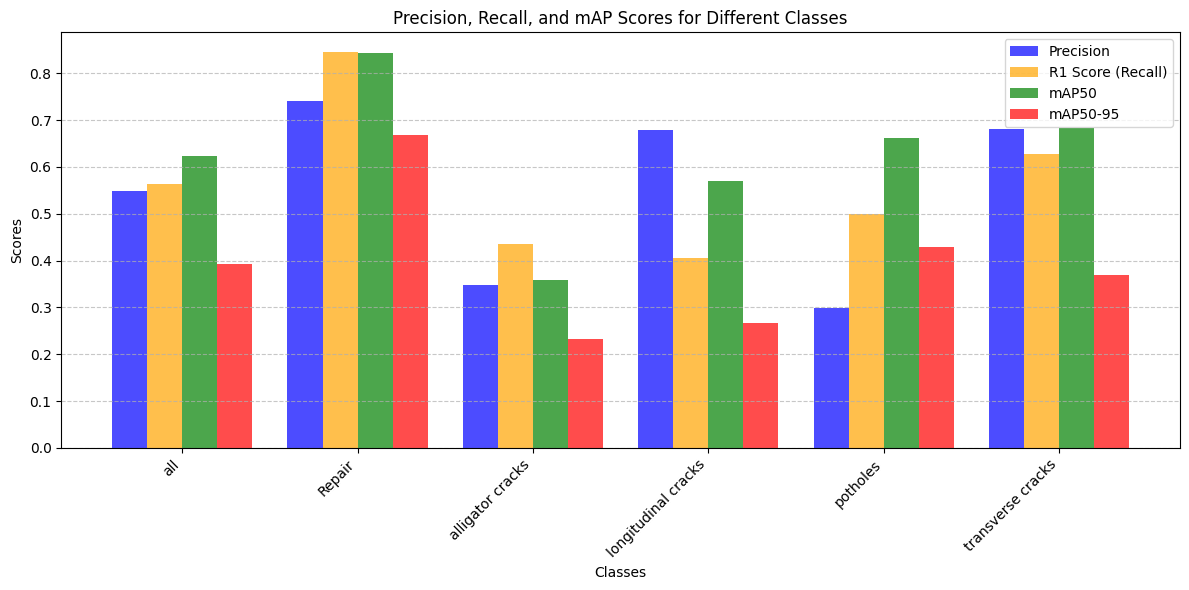

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define the updated results for different classes
classes = ['all', 'Repair', 'alligator cracks', 'longitudinal cracks', 'potholes', 'transverse cracks']
precision = [0.549, 0.741, 0.348, 0.678, 0.298, 0.68]
recall = [0.563, 0.845, 0.435, 0.405, 0.5, 0.628]
mAP50 = [0.623, 0.844, 0.358, 0.569, 0.662, 0.683]
mAP50_95 = [0.393, 0.668, 0.233, 0.267, 0.43, 0.37]

# Plot the metrics
x = np.arange(len(classes))  # Class indices
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(12, 6))

# Create bars for each metric
bar1 = ax.bar(x - width, precision, width, label='Precision', color='blue', alpha=0.7)
bar2 = ax.bar(x, recall, width, label='R1 Score (Recall)', color='orange', alpha=0.7)
bar3 = ax.bar(x + width, mAP50, width, label='mAP50', color='green', alpha=0.7)
bar4 = ax.bar(x + 2 * width, mAP50_95, width, label='mAP50-95', color='red', alpha=0.7)

# Add labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and mAP Scores for Different Classes')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(classes, rotation=45, ha='right')
ax.legend()

# Add a grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()



image 1/1 /content/drive/MyDrive/Detection/red_dataset/test/images/China_Drone_001233_jpg.rf.36e7972c7f17a58fc7d96cbdb878d150.jpg: 416x416 1 transverse cracks, 31.5ms
Speed: 3.5ms preprocess, 31.5ms inference, 6.1ms postprocess per image at shape (1, 3, 416, 416)


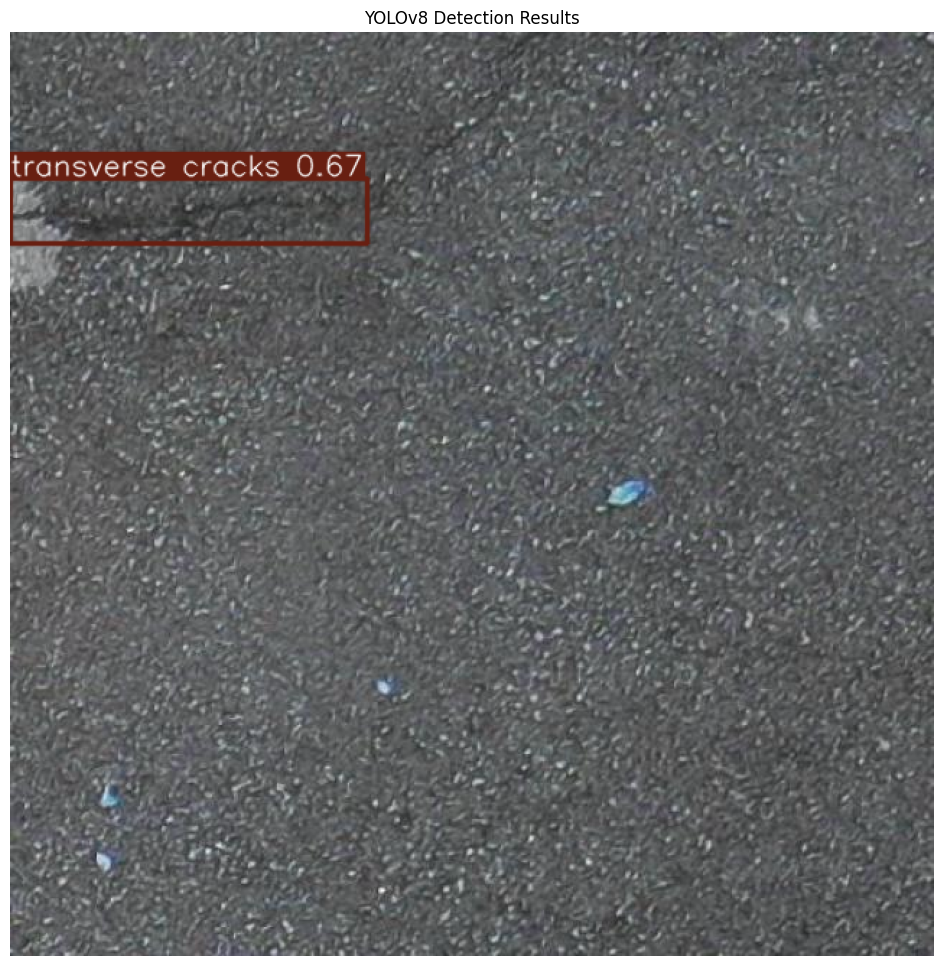

In [19]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model
model_path = "/content/drive/MyDrive/Detection/best.pt"  # Replace with the path to your YOLOv8 weights
model = YOLO(model_path)

# Test the model on a single image
test_image_path = "/content/drive/MyDrive/Detection/red_dataset/test/images/China_Drone_001233_jpg.rf.36e7972c7f17a58fc7d96cbdb878d150.jpg"  # Replace with your test image path
results = model(test_image_path, conf=0.25)  # Adjust confidence threshold as needed

# Display the results in the current Python environment
result_image = results[0].plot()  # Generate annotated image with detections
plt.figure(figsize=(12, 12))
plt.imshow(result_image)
plt.axis("off")
plt.title("YOLOv8 Detection Results")
plt.show()



image 1/1 /content/drive/MyDrive/Detection/red_dataset/test/images/China_Drone_002058_jpg.rf.c1ac55b6bf8c89d95f13d8db29db8149.jpg: 416x416 1 longitudinal cracks, 10.5ms
Speed: 2.1ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)


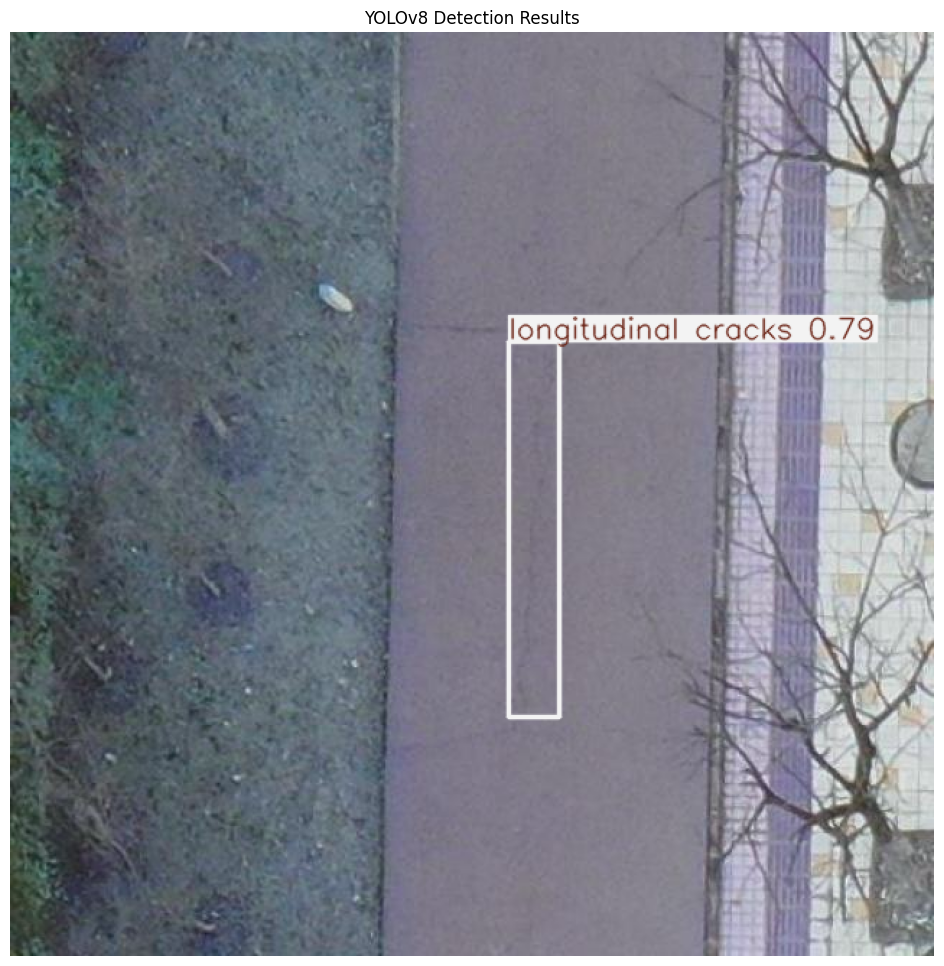

In [20]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model
model_path = "/content/drive/MyDrive/Detection/best.pt"  # Replace with the path to your YOLOv8 weights
model = YOLO(model_path)

# Test the model on a single image
test_image_path = "/content/drive/MyDrive/Detection/red_dataset/test/images/China_Drone_002058_jpg.rf.c1ac55b6bf8c89d95f13d8db29db8149.jpg"  # Replace with your test image path
results = model(test_image_path, conf=0.25)  # Adjust confidence threshold as needed

# Display the results in the current Python environment
result_image = results[0].plot()  # Generate annotated image with detections
plt.figure(figsize=(12, 12))
plt.imshow(result_image)
plt.axis("off")
plt.title("YOLOv8 Detection Results")
plt.show()



image 1/1 /content/drive/MyDrive/Detection/red_dataset/test/images/China_Drone_000205_jpg.rf.3e5b5e8715cdd69b1cd0874af8a0c3ff.jpg: 416x416 1 alligator cracks, 2 longitudinal crackss, 2 potholess, 25.2ms
Speed: 5.7ms preprocess, 25.2ms inference, 5.4ms postprocess per image at shape (1, 3, 416, 416)


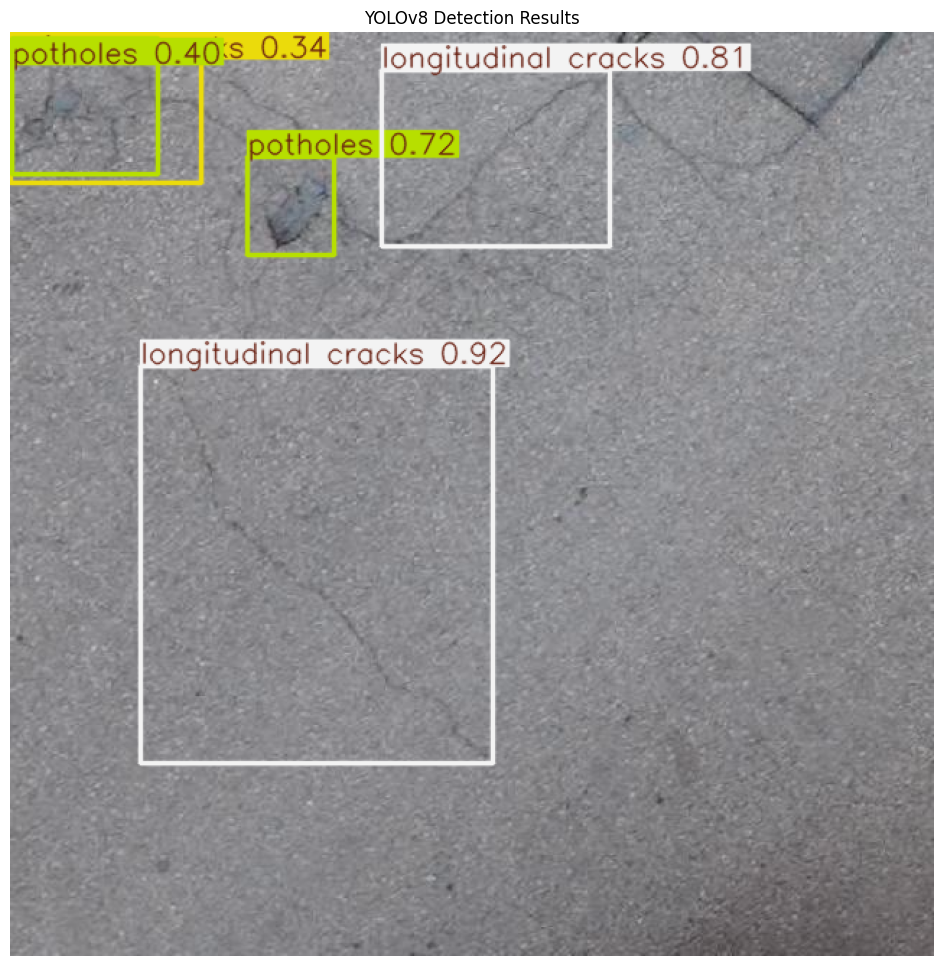

In [18]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model
model_path = "/content/drive/MyDrive/Detection/best.pt"  # Replace with the path to your YOLOv8 weights
model = YOLO(model_path)

# Test the model on a single image
test_image_path = "/content/drive/MyDrive/Detection/red_dataset/test/images/China_Drone_000205_jpg.rf.3e5b5e8715cdd69b1cd0874af8a0c3ff.jpg"  # Replace with your test image path
results = model(test_image_path, conf=0.25)  # Adjust confidence threshold as needed

# Display the results in the current Python environment
result_image = results[0].plot()  # Generate annotated image with detections
plt.figure(figsize=(12, 12))
plt.imshow(result_image)
plt.axis("off")
plt.title("YOLOv8 Detection Results")
plt.show()
